In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#files to read to get all error
#names=['sys_mod2015.txt','sys_pkT2ppT2.txt','sys_pkT2mpT2.txt','sys_mkT2ppT2.txt','sys_mkT2mpT2.txt']
#names=['sys_pkT2ppT2.txt','sys_pkT2mpT2.txt','sys_mkT2ppT2.txt','sys_mkT2mpT2.txt']
#names=['sys_mod2015.txt','sys_mod2011.txt','sys_pkT2ppT2.txt','sys_pkT2mpT2.txt','sys_mkT2ppT2.txt','sys_mkT2mpT2.txt']
#names=['sys_mod2015_1stphilarge.txt','sys_mod2011_1stphilarge.txt']
#names=['sys_pkT2ppT2_1stphilarge.txt','sys_pkT2mpT2_1stphilarge.txt','sys_mkT2ppT2_1stphilarge.txt','sys_mkT2mpT2_1stphilarge.txt']
#names=['sys_mod2015_1stphilarge.txt','sys_mod2011_1stphilarge.txt','sys_pkT2ppT2_1stphilarge.txt','sys_pkT2mpT2_1stphilarge.txt','sys_mkT2ppT2_1stphilarge.txt','sys_mkT2mpT2_1stphilarge.txt']
#names=['sys_pWpWp.txt','sys_pWmWp.txt','sys_mWpWp.txt','sys_mWmWp.txt']
#names=['sys_pWpWp_1phi.txt','sys_pWmWp_1phi.txt','sys_mWpWp_1phi.txt','sys_mWmWp_1phi.txt']#with different phi binnings
#names=['sys_pWpWp_2phi.txt','sys_pWmWp_2phi.txt','sys_mWpWp_2phi.txt','sys_mWmWp_2phi.txt']
#names=['sys_pWpWp_4phi.txt','sys_pWmWp_4phi.txt','sys_mWpWp_4phi.txt','sys_mWmWp_4phi.txt']
#names=['sys_pkTppT_small.txt','sys_pkTmpT_small.txt','sys_mkTppT_small.txt','sys_mkTmpT_small.txt']
#names=['sys_pkTppT_small_pT2.txt','sys_pkTmpT_small_pT2.txt','sys_mkTppT_small_pT2.txt','sys_mkTmpT_small_pT2.txt']
#names=['sys_pkTppT_small_center_pT2.txt','sys_pkTmpT_small_center_pT2.txt','sys_mkTppT_small_center_pT2.txt','sys_mkTmpT_small_center_pT2.txt']
names=['sys_pkTppT_small_center_pT1_phi1.txt','sys_pkTmpT_small_center_pT1_phi1.txt','sys_mkTppT_small_center_pT1_phi1.txt','sys_mkTmpT_small_center_pT1_phi1.txt']

In [3]:
def Get_average_two(d1,d2):
    return (d1+d2)/2

In [4]:
df_0=pd.read_csv('../Unpol_proposal/Materials/results_sys/'+names[0],delim_whitespace=True)
z_lists=df_0['zl'].unique()
print(z_lists)
Q2_lists=df_0['Q2l'].unique()
print(Q2_lists)
phih_lists=df_0['phihl'].unique()
print(phih_lists)
#print(len(z_lists))

[0.3 0.4 0.5]
[1.  1.5 2.  2.5]
[-3.14159265 -1.88495559 -1.25663706 -0.62831853  0.          0.62831853
  1.25663706  1.88495559  2.51327412]


In [5]:
xbj_cuts=[0,0.7]
PhT_cuts = [0.2,0.4]

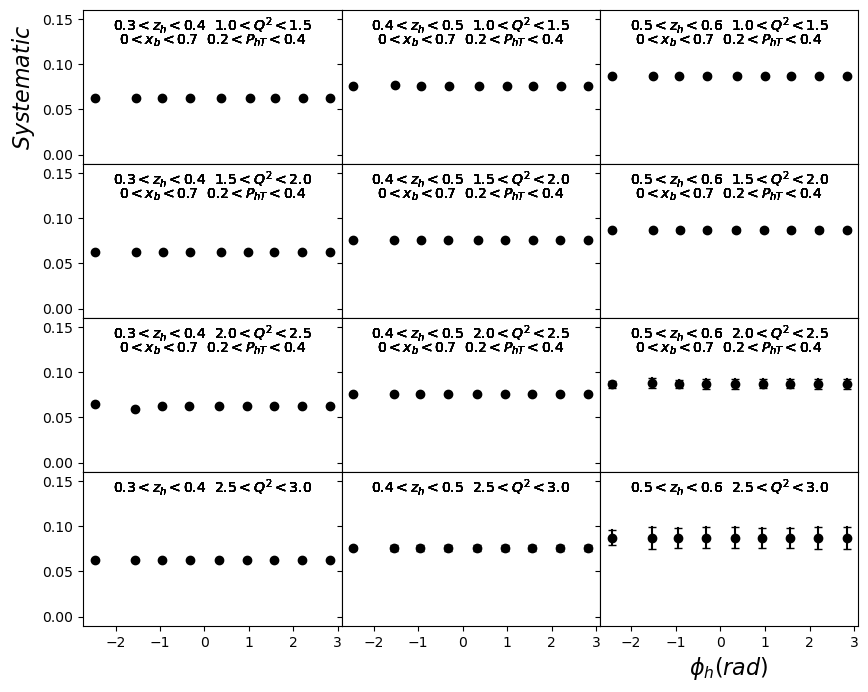

In [6]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)
for i_z in range(0,len(z_lists)):
    for i_Q2 in range(0,len(Q2_lists)):
        phih_lists=df_0[(df_0['zl']==z_lists[i_z])&(df_0['Q2l']==Q2_lists[i_Q2])]['phihl'].to_list()
        for i_phi in range(0,len(phih_lists)):
            #print('z',i_z,z_lists[i_z],'Q2',i_Q2,Q2_lists[i_Q2],'phi',i_phi,phih_lists[i_phi])
            sys_0=df_0[(df_0['zl']==z_lists[i_z])&(df_0['Q2l']==Q2_lists[i_Q2])&(df_0['phihl']==phih_lists[i_phi])]['dFuu'].values[0]
            sys_err_0=df_0[(df_0['zl']==z_lists[i_z])&(df_0['Q2l']==Q2_lists[i_Q2])&(df_0['phihl']==phih_lists[i_phi])]['dFuu_err'].values[0]
            phih_0=df_0[(df_0['zl']==z_lists[i_z])&(df_0['Q2l']==Q2_lists[i_Q2])&(df_0['phihl']==phih_lists[i_phi])]['phih'].values[0]
            zr=df_0[(df_0['zl']==z_lists[i_z])&(df_0['Q2l']==Q2_lists[i_Q2])&(df_0['phihl']==phih_lists[i_phi])]['zr'].values[0]
            Q2r=df_0[(df_0['zl']==z_lists[i_z])&(df_0['Q2l']==Q2_lists[i_Q2])&(df_0['phihl']==phih_lists[i_phi])]['Q2r'].values[0]
            for i_name in names[1:]:
                df=pd.read_csv('../Unpol_proposal/Materials/results_sys/'+i_name,delim_whitespace=True)
                try:
                    sys_i=df[(df['zl']==z_lists[i_z])&(df['Q2l']==Q2_lists[i_Q2])&(df['phihl']==phih_lists[i_phi])]['dFuu'].values[0]
                    sys_o=Get_average_two(sys_0,sys_i)
                    sys_0=sys_o
                    sys_err_i=df[(df['zl']==z_lists[i_z])&(df['Q2l']==Q2_lists[i_Q2])&(df['phihl']==phih_lists[i_phi])]['dFuu_err'].values[0]
                    sys_err_o=Get_average_two(sys_err_0,sys_err_i)
                    sys_err_0=sys_err_o
                    phih_i=df[(df['zl']==z_lists[i_z])&(df['Q2l']==Q2_lists[i_Q2])&(df['phihl']==phih_lists[i_phi])]['phih'].values[0]
                    phih_o=Get_average_two(phih_0,phih_i)
                    phih_0=phih_o
                except IndexError:
                    print('no data here i_z,i_Q2,i_phi',i_z,i_Q2,i_phi)
            axs[i_Q2][i_z].plot([phih_0,phih_0],[sys_0-sys_err_0,sys_0+sys_err_0],color='black',marker='_')
            axs[i_Q2][i_z].plot(phih_0,sys_0,'ko')
            axs[i_Q2][i_z].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_lists[i_z],zr,Q2_lists[i_Q2],Q2r), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2][i_z].transAxes)
            axs[i_Q2][i_z].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
        axs[i_Q2-1][i_z-1].set_ylim(-0.01,0.16)
axs[0][0].set_ylabel('$Systematic$',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_sys/Systemaic_from_all.pdf')           